<a href="https://colab.research.google.com/github/ssanchezgoe/eafit_isa/blob/main/Nb_Google_Colab/S05_Bases_Estadisticas_Version_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <tr>
     <th><p><img alt="Colaboratory logo" height="80px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Sena_Colombia_logo.svg/1045px-Sena_Colombia_logo.svg.png" align="left" hspace="10px" vspace="0px"></p></th> 
    <th><p><img alt="Colaboratory logo" height="80px" src="https://www.isa.co/wp-content/uploads/2020/11/logo.png" align="right" hspace="10px" vspace="0px"></p></th>
    <th><p><img alt="Colaboratory logo" height="80px" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/EAFIT-2015.png" align="left" hspace="10px" vspace="0px"></p></th> 
     <th><h1>  Bases de Estadística Básica Aplicada </h1></th>
  </tr>








<p><a name="contents"></a></p>

# Contenido Sesión: Introducción al Machine Learning.

- <a href="#ML">1. Modelos basados en datos y Machine Learning</a><br>
  - <a href="#modelML">1.1. Modelos que se pueden construir</code></a><br>
  - <a href="#terms">1.2. Terminología</code></a><br>
  - <a href="#supML">1.3. Aprendizaje supervisado</code></a><br>
  - <a href="#nonsupML">1.4. Aprendizaje no supervisado</code></a><br>
  - <a href="#data">1.5. Observaciones acerca de los datos</code></a><br>
- <a href="#sklearn">2. Introducción a Scikit-Learn</a><br>
  - <a href="#sklearnG">2.1 Generalidades</a><br>
  - <a href="#sklearnT">2.2. Tratamiento de datos</a><br>
    - <a href="#sklearnTT">2.2.1 Datos de entrenamiento y de prueba</a><br>
    - <a href="#sklearnCT">2.2.2 Conversión de variables categóricas</a><br>
    - <a href="#sklearnFS">2.2.3 Escalamiento de características</a><br>
    - <a href="#sklearnPL">2.2.4 Pipeline</a><br>
- <a href="#taller">3. Taller</a><br>




<p><a name="ML"></a></p>

# 1. Modelos basados en datos y Machine Learning

[Contenidos](#contents) 

<p><a name="modelML"></a></p>

## 1.1. Modelos que se pueden construir

[Contenidos](#contents)


¿Qué es un modelo derivado de los datos?

Caso ideal: Sabemos las distribuciones de las que vienen los datos. ⇒ podemos calcular analíticamente nuestro modelo.

¿Podemos encontrar un modelo con 100% de acierto? ¿Por qué sí, o por qué no?



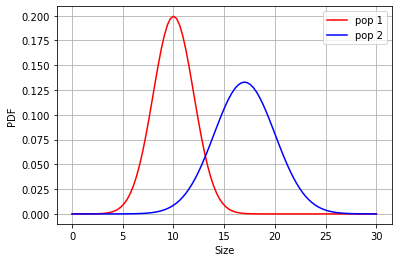

In [ ]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt


d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)


x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

**Cálculo de la frontera óptima** (conocida también como _frontera bayesiana_).

frontera óptima en 13.15


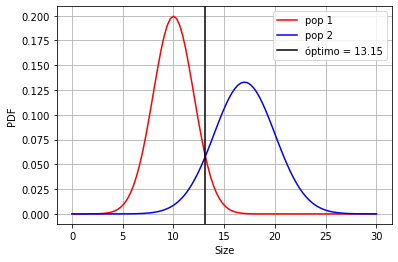

In [ ]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print ("frontera óptima en %.2f"%minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label=u"óptimo = %.2f"%minx)
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

Cálculo analítico de los errores de clasificación

In [ ]:
print ("pop 1 error", 1-d1.cdf(minx))
print ("pop 2 error", d2.cdf(minx))

pop 1 error 0.05773516274534907
pop 2 error 0.09957961739117976


### Caso 1D

**Caso real**: Tenemos una muestra de los datos 

$\rightarrow$ ¿Cómo determinamos donde poner la frontera?

$\rightarrow$ ¿Qué frontera qusiéramos obtener?

In [ ]:
# Función para construir y graficar datasets con dos grupos, rojos y azules, en una dimensión
def show_1D_dataset_samples(n, n_datasets=10, dot_alpha=.5, line_alpha=.5, figsize=(20,5)):
    from sklearn.tree import DecisionTreeClassifier
    plt.figure(figsize=figsize)
    for i in range(n_datasets):

        m1 = d1.rvs(n)
        m2 = d2.rvs(n)
        X = np.append(m1, m2).reshape(-1,1)
        y = np.r_[[0]*len(m1)+[1]*len(m2)]
        estimator = DecisionTreeClassifier(max_depth=1)
        estimator.fit(X,y)
        Xr = np.linspace(5, 30, 100).reshape(-1,1)
        yr = estimator.predict(Xr)
        plt.plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        plt.plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        plt.scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        plt.scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100)
    plt.axis("off")

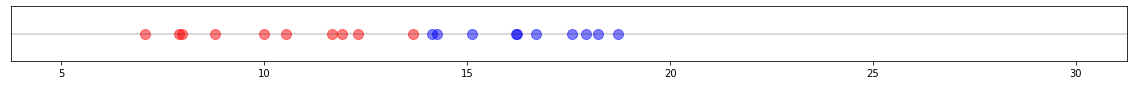

In [ ]:
show_1D_dataset_samples(10, n_datasets=1, dot_alpha=.5, line_alpha=0, figsize=(20,1))
plt.axis("on")
plt.ylim(.095, .105)
plt.yticks([])
plt.axhline(.1, color="black", alpha=.2)

Veamos como se puede mejorar la definición de la frontera a medida que aumentamos la cantidad de muestras.

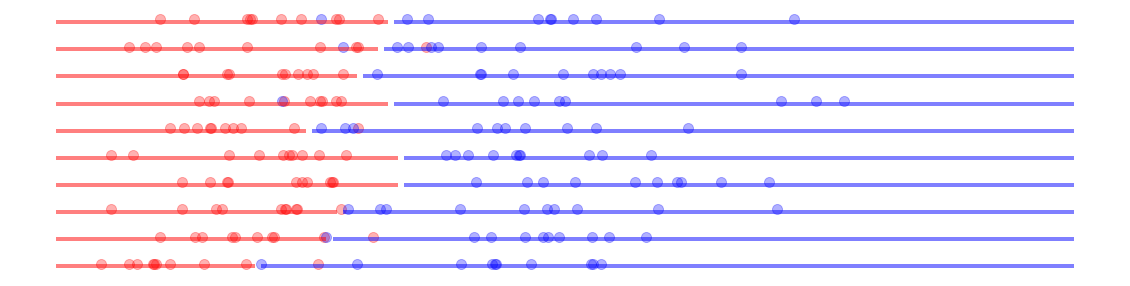

In [ ]:
show_1D_dataset_samples(10, dot_alpha=.3)

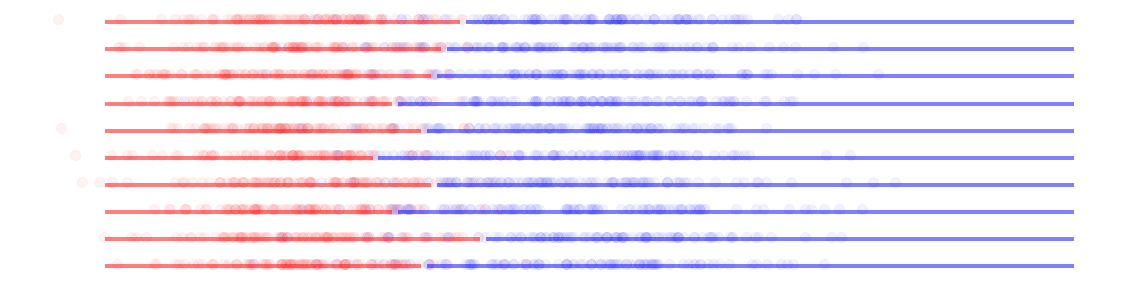

In [ ]:
show_1D_dataset_samples(100, dot_alpha=.05)

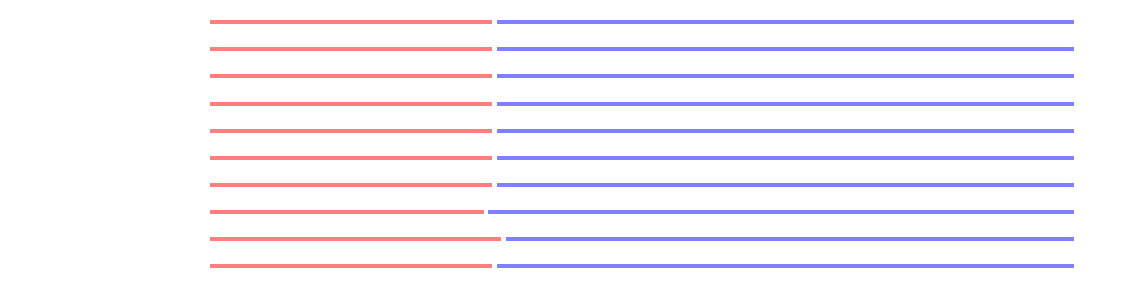

In [ ]:
show_1D_dataset_samples(10000, dot_alpha=.001)

### Caso en 2D

- En 2D, un modelo de clasificación **es una frontera** en el plano


- **Objetivo:** hallar la frontera que produce menos error de clasificación


In [ ]:
# copiando el archivo mlutils.py en la carpeta local
!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"

--2021-09-10 12:21:45--  https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10691 (10K) [text/plain]
Saving to: ‘mlutils.py’

mlutils.py          100%[===================>]  10.44K  --.-KB/s    in 0s      

2021-09-10 12:21:45 (60.8 MB/s) - ‘mlutils.py’ saved [10691/10691]



In [ ]:
import mlutils 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Muestreo de datos "pseudoaleatoria" para clasificar en dos grupos: rojos, azules

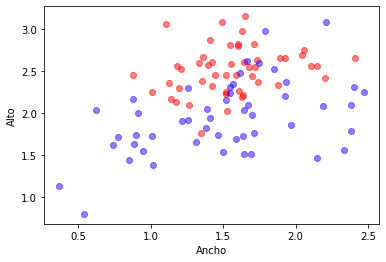

In [ ]:
mc = mlutils.Example_Bayes2DClassifier(mean0=[1.5, 2.5], cov0=[[0.1, 0.], [0., 0.1]],
                                        mean1=[1.5, 2.], cov1=[[0.2,0.1],[0.1,.2]])
X,y = mc.sample(100)
mlutils.plot_2Ddata(X, y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador lineal

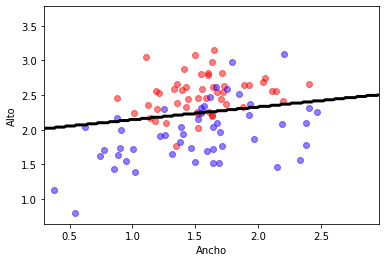

In [ ]:
from sklearn.linear_model import LogisticRegression
estimador=LogisticRegression()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador bosque aleatorio

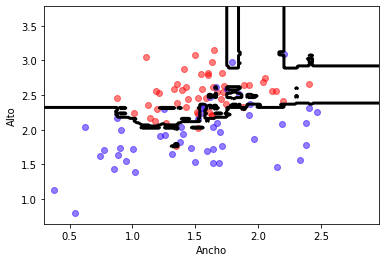

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimador=RandomForestClassifier()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Clasificador máquina de soporte vectorial

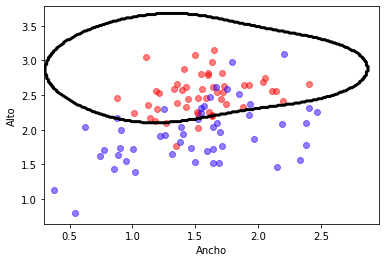

In [ ]:
from sklearn.svm import SVC
estimador=SVC()
estimador.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimador.predict,X,y)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

**Los algoritmos de machine learning:**

- Los algoritmos de clasificación **calculan fronteras** entre los datos.
- Parten de una muestra de los datos, **no de las distribuciones**.
- Por tanto, **no conocemos** la forma de la frontera bayesiana. O sea, **partimos ciegos**!!!!!!!

Para abordar esta situación, **cualquier algoritmo** tiene necesariamente que plantear una alguna suposición de base:

- los datos vienen de distribuciones normales.
- las columnas son estadísticamente independientes.
- la frontera es lineal, o cuadrática.

Teniendo esto en cuenta, y **partiendo de una muestra de los datos**:

- el objetivo de un usuario de ML es acercarse lo más posible a la **frontera bayesiana** (que no sabemos cómo es).
- distintos algoritmos ML tienen **distintas capacidades** para modelar fronteras (un clasificador lineal no puede captuarar una frontera cuadrática).
- necesitamos dos tipos de herramientas:
   - una buena colección de algoritmos ML.
   - métodos para saber qué tan cerca estamos de la frontera bayesiana.

<p><a name="terms"></a></p>

## 1.2. Terminología

[Contenidos](#contents)

Existen conceptos clave que sientan las bases para una mejor comprensión del ML. Aprenderemos la nomenclatura (términos estándar) que se utiliza para describir los datos, así como los términos utilizados para describir el aprendizaje y el modelado.


La estructura tradicional para los datos en el campo del ML tienen la siguiente forma:

![picture](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2013/12/Table-of-Data-Showing-an-Instance-Feature-and-Train-Test-Datasets.png)

* **Instancia**: A una sola fila de datos se le llama instancia. También se le conoce como una observación del dominio.
* **Característica** (Feature): A una sola columna de datos se le llama característica. Es un componente de una observación y también se denomina atributo de una instancia de datos (La característica se suele asociar con el atributo y su valor, aunque la mayoría de las veces se usa atributo y característica indistintamente). Algunas características pueden ser entradas a un modelo (predictores) y otras pueden ser salidas o las características a predecir (también llamadas *labels*).
* **Datos de entrenamiento**: Conjunto de datos que introducimos a nuestro algoritmo para entrenar nuestro modelo.
* **Datos de prueba**: Conjunto de datos que utilizamos para validar la precisión de nuestro modelo pero que no se utiliza para entrenarlo. Puede llamarse conjunto de datos de validación.

Otros términos que utilizaremos frecuentemente son:

* **Parámetros del modelo**: Son aquellos que pertenecen al modelo utilizado para realizar el procedimiento de ajuste
* **Hiperparámetros**: Es un parámetro de un algoritmo de aprendizaje (no del
modelo). Como tal, no se ve afectado por el algoritmo de aprendizaje en sí; debe establecerse antes
al entrenamiento y permanece constante durante el entrenamiento.
* **Métrica**: Medida cuantitativa usada para evaluar el rendimiento del algoritmo.


<p><a name="supML"></a></p>

## 1.3. Aprendizaje supervisado

[Contenidos](#contents)

El aprendizaje supervisado implica de alguna manera modelar la relación entre las características de los datos y alguna etiqueta asociada a estos; una vez que se determina el modelo, se puede usar para asociar etiquetas a datos nuevos y desconocidos. El aprendizaje supervisado se subdivide en clasificación y regresión: En clasificación se tienen etiquetas discretas, mientras que en la regresión, las etiquetas son cantidades continuas.

### 1.3.1 Clasificación: Prediciendo etiquetas discretas.

En clasificación, tenemos un conjunto de puntos etiquetados y deseamos utilizarlos para clasificar algunos puntos no etiquetados. Imaginemos que tenemos los datos que se muestran en la siguiente figura

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-1.png)

Tenemos dos características para cada punto, representadas por las posiciones (x, y). Además, tenemos una de las dos etiquetas de clases para cada punto, representadas por los colores de los puntos. A partir de estas características y etiquetas, nos gustaría crear un modelo que nos permita decidir si un nuevo punto debe etiquetarse como "azul" o "rojo". Un posible modelo es asumir que los dos grupos pueden separarse dibujando una línea recta a través del plano entre ellos, de modo que los puntos a cada lado de la línea caen en el mismo grupo.

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-classification-2.png)

Este modelo es una versión cuantitativa del enunciado "una línea recta separa las clases", mientras que los parámetros del modelo son los números que describen la ubicación y orientación de la línea. Los valores óptimos para estos parámetros se aprenden de los datos (este es el "aprendizaje" en ML), que a menudo se denomina *entrenar el modelo*. Ahora que el modelo ha sido entrenado, se puede generalizar a datos nuevos sin etiquetas. Esta etapa generalmente se llama *predicción*.


<p><a name="nonsupML"></a></p>

## 1.4. Aprendizaje no supervisado

[Contenidos](#contents)


El aprendizaje no supervisado implica modelos que describen datos sin referencia a cualquier etiqueta conocida. Un caso común de aprendizaje no supervisado es el de *agrupamiento* (clustering) en el que los datos se asignan automáticamente a un cierto número de grupos discretos. Por ejemplo, podríamos tener algunos datos bidimensionales

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-1.png)

A simple vista, está claro que cada uno de estos puntos es parte de un grupo distinto. Dada esta entrada, un modelo de agrupamiento utilizará la estructura intrínseca de los datos para determinar qué puntos están relacionados, con un resultado como el siguiente

![picture](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.01-clustering-2.png)

Algunos algoritmos de aprendizaje no supervisado son:

* Agrupamiento
  * Jerárquico
  * Basado en densidad
  * k-medias
* Detección de anomalías
* Visualización y reducción dimensional


<p><a name="data"></a></p>

## 1.5. Observaciones acerca de los datos

[Contenidos](#contents)

* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. Incluso para problemas muy simples, generalmente se necesitan miles de ejemplos, y para problemas complejos como el reconocimiento de imágenes o de voz puede necesitarse millones de ejemplos. 

* **Datos de entrenamiento no representativos**: Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos que desea generalizar. Al usar un conjunto de entrenamiento no representativo, entrenamos un modelo con el cual es poco probable obtener predicciones precisas. Incluso muestras muy grandes pueden no ser representativas si el método de muestreo es defectuoso (sesgo en el muestreo).

* **Datos de baja calidad**: Obviamente, si los datos de entrenamiento están llenos de errores, valores atípicos y ruido (por ejemplo, debido a mediciones de baja calidad), será más difícil para el algoritmo detectar los patrones subyacentes, por lo que es menos probable que funcione bien. ¡Siempre vale la pena dedicar tiempo a limpiar los datos de entrenamiento!

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes y no demasiadas irrelevantes. Una parte fundamental del éxito de un proyecto de ML es crear un buen conjunto de características para el entrenamiento. Este proceso se conoce como ingeniería de características. 

### ¡Los datos son más importantes que los algoritmos!

<p><a name="sklearn"></a></p>

# 2. Introducción a Scikit-Learn

[Contenidos](#contents) 




<p><a name="sklearnG"></a></p>

## 2.1 Generalidades

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de ML. Uno de los más conocidos es Scikit-Learn, un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. La API de Scikit-Learn está notablemente bien diseñada. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro. Ya habíamos visto un ejemplo de un estimador cuando realizamos el llenado de valores nulos con `SimpleImputer` (La estrategía de llenado, en este caso "most frequent", es un ejemplo de un hiperparámetro)


In [ ]:
X = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


In [ ]:
X.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')  # instanciamos para crear el objeto imputer

In [ ]:
len(X)

48842

In [ ]:
imputer.fit(X[['occupation']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [ ]:
X.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

* **Transformadores**: Algunos estimadores (como el imputer) también pueden transformar un conjunto de datos; Estos se llaman transformadores. Una vez más, la API es bastante simple: la transformación se realiza mediante el método `transform()` con el conjunto de datos para transformar como parámetro. Los transformadores también tienen un método conveniente llamado `fit_transform()` que es equivalente a llamar a `fit()` y luego aplicar `transform()`

In [ ]:
imp.fit_transform

In [ ]:
imp = SimpleImputer(strategy='most_frequent')
transformed_data = pd.DataFrame(imp.fit_transform(X))

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(X.values)

numpy.ndarray

In [ ]:
X.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


In [ ]:
X.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
X[X.occupation==np.nan]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class


In [ ]:
transformed_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [ ]:
transformed_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


In [ ]:
transformed_data.columns = X.columns
transformed_data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
37566,1,Private,201122,HS-grad,9,Separated,Tech-support,Not-in-family,White,Male,0,0,2,United-States,<=50K
2720,2,Local-gov,50442,Some-college,10,Never-married,Adm-clerical,Unmarried,Amer-Indian-Eskimo,Female,1,0,1,United-States,<=50K
10196,1,Private,345277,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
1451,4,Private,185749,11th,7,Widowed,Transport-moving,Unmarried,Black,Male,0,0,2,United-States,<=50K
9838,2,Private,249720,Bachelors,13,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,1,United-States,<=50K


* **Predictores**: Finalmente, algunos estimadores son capaces de hacer predicciones dado un conjunto de datos; Estos se conocen como predictores. Un predictor tiene un método `predict()` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes. También tiene un método `score()` que mide la calidad de las predicciones dado un conjunto de prueba. (El modelo `LinearRegression` que veremos más adelante es un ejemplo de un predictor)


<p><a name="sklearnT"></a></p>

## 2.2 Tratamiento de datos

ML se trata de crear modelos a partir de datos. Por esta razón, comenzaremos discutiendo algunos aspectos necesarios del tratamiento de los datos previos a la aplicación del algoritmo de ML en sklearn

In [ ]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


<p><a name="sklearnTT"></a></p>

### 2.2.1 Datos de entrenamiento y de prueba

Comencemos por crear la matrix de características **X** y el vector (serie) de etiquetas **y**. Supongamos que en este caso queremos predecir la característica "age":

In [ ]:
X = df.drop("age", axis=1) # Características
X.shape

(48842, 14)

In [ ]:
y = df["age"] # Variable objetivo
y.shape

(48842,)




Generalmente se elige el 20% de los datos para la prueba y el resto para el entrenamiento. Los datos se deben dividir eligiendo los datos de manera aleatoria. Existen varias maneras de realizar este proceso

   1) Crear una función que seleccione el 20% de los datos aleatoriamente.
      
   2) De la librería `sklearn.model_selection` usar las funciones:
      
      * train_test_split
       
      * StratifiedShuffleSplit 
      
La primera función dividirá los datos en los mismos índices (esto es muy útil, por ejemplo, si tenemos un DataFrame separado para las etiquetas). La segunda función hace lo que se conoce como un muestreo estratificado, el cual se usa en el caso de que no haya suficientes datos y queramos evitar introducir sesgos




In [ ]:
# Cuando tengamos una cantidad de datos tal que estemos seguros que no introduciremos un sesgo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # random_state nos permite establecer una semilla 

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(39073, 14) (39073,)
(9769, 14) (9769,)


In [ ]:
len(X)*0.2

9768.4

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=40)

for train_index, test_index in s.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
  
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(39073, 14) (39073,)
(9769, 14) (9769,)


<p><a name="sklearnCT"></a></p>

### 2.2.2 Conversión de variables categóricas

Para la conversión de variables categóricas, sklearn ofrece los módulos `OrdinalEncoder` y `OneHotEncoder`

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

In [ ]:
len(df.education.unique())

16

In [ ]:
df.education

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
           ...    
48837    Bachelors
48838      HS-grad
48839    Bachelors
48840    Bachelors
48841    Bachelors
Name: education, Length: 48842, dtype: object

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df[["education"]])
df_cat_encoded

array([[ 9.],
       [ 9.],
       [11.],
       ...,
       [ 9.],
       [ 9.],
       [ 9.]])

In [ ]:
max(df_cat_encoded)

array([15.])

In [ ]:
from sklearn.preprocessing import OneHotEncoder # Variables Dummies 

Supongamos que tenemos tres clases:

x(precio) -> ['Alto', 'Medio', 'Baja']

- alto -> [1, 0, 0]
- medio -> [0, 1, 0]
- bajo -> [0, 0, 1]

In [ ]:
cat_encoder = OneHotEncoder()
cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df[["sex"]])
df_cat_1hot[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [ ]:
df.sex

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839      Male
48840      Male
48841      Male
Name: sex, Length: 48842, dtype: object

Por defecto el `OneHotEncoder` retorna una matriz dispersa (sparse). Muchos de los estimadores de Sklearn aceptan entradas de este tipo al ajustar y evaluar modelos. 

<p><a name="sklearnFS"></a></p>

### 2.2.3 Escalado de características

Los algoritmos de ML no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes (o en algunos casos las entradas deben estar normalizadas). Para resolver esto, Scikit-Learn tiene dos funciones para que todos los atributos tengan la misma escala: 

* Normalización  
$$ x'=\frac{x-x_{min}}{x_{max}-x_{min}}.$$ 




In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[0.5 ],
       [0.75],
       [0.5 ],
       ...,
       [0.5 ],
       [0.5 ],
       [0.25]])

* Estandarización:
$$ x'=\frac{x-\bar x}{\sigma} $$

In [ ]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
sscaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[ 0.17672381],
       [ 0.94870704],
       [ 0.17672381],
       ...,
       [ 0.17672381],
       [ 0.17672381],
       [-0.59525942]])

<p><a name="sklearnPL"></a></p>

### 3.2.4 Pipeline

Un *Pipeline* es una secuencia de transformaciones que se utilizan para automatizar flujos de trabajo. Los pipelines son muy comunes en los sistemas de ML, ya que hay muchos datos para manipular y muchas transformaciones de datos para aplicar. Sklearn proporciona la clase `Pipeline`. En el siguiente ejemplo crearemos un pipeline para 

1) Reemplazar los valores nulos por la media 

2) Estandarizar los datos.


In [ ]:
from sklearn.pipeline import Pipeline

`Pipeline` recibe una lista de tuplas:

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

df_age_pipe = num_pipeline.fit_transform(df[["age"]])

trans_age = pd.DataFrame(df_age_pipe)
print(trans_age.std(),trans_age.mean())


0    1.00001
dtype: float64 0   -1.553935e-15
dtype: float64


In [ ]:
df_age_pipe.std()

1.0

Hasta acá hemos estudiado las fases de:

- Exploratory Data Analysis (EDA).
- Data wrangling (Data preprocessing).

**Nota**: Se puede realizar preprocesado de variables catergóricas con ruido (categorías que no deben existir en los datos) mediante el uso de expresiones regulares.

- alto
- medio
- bajo
- medio_drop
- xxxxx

<p><a name="taller"></a></p>

# 3. Taller

[Contenidos](#contents) 


## Pregunta 1

Cargar el dataset de autos, eliminar las filas con valores nulos y dejar solo las columnas con variables numéricas

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

df.dropna(inplace=True)
dfNum=df.select_dtypes(include=['float64','int64'])

--->

## Pregunta 2

Definir la variable a predecir $y$ como el precio y la matriz de características $X$ con el resto de variables numéricas

Hacer doble click <b>aquí</b> para ver la solución:

<!-- Respuesta:

y=dfNum['price']
X=dfNum.loc[:, dfNum.columns != 'price']
#alternativa dfNum.drop('price',axis=1)


--->